In [2]:
# setup
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

import json
import dataclasses
import typing_extensions as typing
import os
from dotenv import load_dotenv

load_dotenv()
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

/home/ravi0531rp/anaconda3/envs/langchain-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Using `response_mime_type` requires either a Gemini 1.5 Pro or 1.5 Flash model
model = genai.GenerativeModel('gemini-1.5-flash',
                              # Set the `response_mime_type` to output JSON
                              generation_config={"response_mime_type": "application/json"})

prompt = """
  List 5 popular cookie recipes.
  Using this JSON schema:
    Recipe = {"recipe_name": str}
  Return a `list[Recipe]`
  """

response = model.generate_content(prompt)
print(response.text)

[{"recipe_name": "Chocolate Chip Cookies"}, {"recipe_name": "Oatmeal Raisin Cookies"}, {"recipe_name": "Peanut Butter Cookies"}, {"recipe_name": "Snickerdoodles"}, {"recipe_name": "Sugar Cookies"}]


In [5]:
type(response.text)

str

In [6]:
import ast 

ast.literal_eval(response.text)

[{'recipe_name': 'Chocolate Chip Cookies'},
 {'recipe_name': 'Oatmeal Raisin Cookies'},
 {'recipe_name': 'Peanut Butter Cookies'},
 {'recipe_name': 'Snickerdoodles'},
 {'recipe_name': 'Sugar Cookies'}]

In [10]:
import google.generativeai as genai
import typing_extensions as typing

class Recipe(typing.TypedDict):
  recipe_name: str
  ingredients: str


# Using `response_mime_type` with `response_schema` requires a Gemini 1.5 Pro model
model = genai.GenerativeModel('gemini-1.5-flash',
                              # Set the `response_mime_type` to output JSON
                              # Pass the schema object to the `response_schema` field
                              generation_config={"response_mime_type": "application/json",
                                                 "response_schema": list[Recipe]})

prompt = "List 5 popular chicken recipes"

response = model.generate_content(prompt)
print(response.text)

[{"ingredients": "Chicken breasts, olive oil, lemon juice, garlic, oregano, salt, pepper", "recipe_name": "Greek Lemon Chicken"}, {"ingredients": "Chicken thighs, butter, flour, milk, salt, pepper", "recipe_name": "Chicken Pot Pie"}, {"ingredients": "Chicken breasts, bacon, ranch dressing mix, cheese", "recipe_name": "Chicken Bacon Ranch Casserole"}, {"ingredients": "Chicken pieces, barbecue sauce, brown sugar", "recipe_name": "BBQ Chicken"}, {"ingredients": "Chicken breasts, bread crumbs, Parmesan cheese, butter, herbs", "recipe_name": "Chicken Parmesan"}]


## Pydantic Classes

In [11]:
from pydantic import BaseModel
from typing import List
import json

# Define Pydantic models
class Recipe(BaseModel):
    ingredients: str
    recipe_name: str

class RecipeList(BaseModel):
    recipes: List[Recipe]



# Parse JSON data
data = json.loads(response.text)

# Create Pydantic model instance
recipe_list = RecipeList(recipes=[Recipe(**recipe) for recipe in data])

# Access and print recipe data
for recipe in recipe_list.recipes:
    print(f"Recipe: {recipe.recipe_name}")
    print(f"Ingredients: {recipe.ingredients}")
    print()

# Accessing a specific recipe
print("First recipe:")
print(recipe_list.recipes[0].recipe_name)
print(recipe_list.recipes[0].ingredients)

Recipe: Greek Lemon Chicken
Ingredients: Chicken breasts, olive oil, lemon juice, garlic, oregano, salt, pepper

Recipe: Chicken Pot Pie
Ingredients: Chicken thighs, butter, flour, milk, salt, pepper

Recipe: Chicken Bacon Ranch Casserole
Ingredients: Chicken breasts, bacon, ranch dressing mix, cheese

Recipe: BBQ Chicken
Ingredients: Chicken pieces, barbecue sauce, brown sugar

Recipe: Chicken Parmesan
Ingredients: Chicken breasts, bread crumbs, Parmesan cheese, butter, herbs

First recipe:
Greek Lemon Chicken
Chicken breasts, olive oil, lemon juice, garlic, oregano, salt, pepper


## Starting with Pydantic

In [12]:
from enum import Enum
from typing import Union

from pydantic import BaseModel

In [13]:
from enum import Enum
from pydantic import BaseModel

class ProductType(str, Enum):
    """
    Enumeration of product types.

    This enum represents different categories of products that can be referenced.
    """
    device = "device"
    app = "app"
    ft = "fintech"
    saas = "saas"
    consumer_tech = "consumer_tech"

class OrgType(str, Enum):
    """
    Enumeration of product types.

    This enum represents different categories of products that can be referenced.
    """
    startup = "startup"
    big_tech = "big_tech"
    tech_media = "tech_media"
    social_media = "social_media"
    gov = "govt_org"
    non_prof = "non_profit_org"
    vc = "venture_captial"
    other = "other"

class Person(BaseModel):
    """
    Represents an individual associated with an organization.

    This model captures basic information about a person, including their name,
    the organization they're associated with, and their role within that organization.
    """
    name: str
    organization: str
    role: str

class Product(BaseModel):
    """
    Represents a product offered by an organization.

    This model captures basic information about a product, including its name,
    the organization it belongs to, and its type.
    """
    name: str
    organization: str
    product_type: ProductType

class Organization(BaseModel):
    """
    Represents an organization or company.

    This model captures basic information about an organization, including its name
    and location.
    """
    name: str
    org_type: OrgType
    location: str

class ArticleResponse(BaseModel):
    """
    Represents the structured response for an article analysis.

    This model aggregates information about products, people, and organizations
    mentioned in an article, along with a summary of the article's content.
    """
    products: list[Product]
    people: list[Person]
    organizations: list[Organization]
    summary: str

In [14]:
json_schema = ArticleResponse.schema_json(indent=2)
print(json_schema)

{
  "$defs": {
    "OrgType": {
      "description": "Enumeration of product types.\n\nThis enum represents different categories of products that can be referenced.",
      "enum": [
        "startup",
        "big_tech",
        "tech_media",
        "social_media",
        "govt_org",
        "non_profit_org",
        "venture_captial",
        "other"
      ],
      "title": "OrgType",
      "type": "string"
    },
    "Organization": {
      "description": "Represents an organization or company.\n\nThis model captures basic information about an organization, including its name\nand location.",
      "properties": {
        "name": {
          "title": "Name",
          "type": "string"
        },
        "org_type": {
          "$ref": "#/$defs/OrgType"
        },
        "location": {
          "title": "Location",
          "type": "string"
        }
      },
      "required": [
        "name",
        "org_type",
        "location"
      ],
      "title": "Organization",
      "

## Get Articles

In [16]:
import newspaper

def download_article(url):
    # Create an Article object
    article = newspaper.Article(url)

    # Download and parse the article
    article.download()
    article.parse()

    # Get the article text
    article_text = article.text

    return article_text


In [17]:

url = "https://techcrunch.com/2024/08/13/made-by-google-2024-a-few-ai-features-you-mightve-missed/"
article = download_article(url)

# Now, 'content' contains the text of the article
print("Article content:")
print(article[:500] + "...")

Article content:
Google’s annual Made by Google hardware event was held earlier Tuesday, and because the company announced so much stuff, a lot got lost in the shuffle. We rounded up some of the more intriguing AI-related announcements that didn’t get a ton of play, like the image-generating Pixel Studio and Pixel Screenshots, which helps save and organize info in screenshots.

Call Notes summarizes your conversations

For short-term-memory-challenged folks like this writer, Call Notes could be a useful feature....


In [18]:
import json

model = genai.GenerativeModel(
  "models/gemini-1.5-flash",
  system_instruction=f"""You are a helpful assistant that scans for
  people, products and organizations mentioned in articles.
  Using this JSON schema:
    ArticleResponse = {json_schema}
  Return a `ArticleResponse`

  """,
    generation_config={"response_mime_type": "application/json",
                    #    "response_schema": dict_schema
                       }
)

response = model.generate_content(article)

json_object = json.loads(response.text)
print(json_object['people'])
for product in json_object['products']:
    print(product)

print(json_object['organizations'])
print("Summary:",json_object['summary'])



[{'name': 'Ivan Mehta', 'organization': 'Not specified', 'role': 'colleague'}]
{'name': 'Pixel Studio', 'organization': 'Google', 'product_type': 'app'}
{'name': 'Pixel Screenshots', 'organization': 'Google', 'product_type': 'app'}
{'name': 'Pixel 9', 'organization': 'Google', 'product_type': 'device'}
{'name': 'Pixel 9 Pro', 'organization': 'Google', 'product_type': 'device'}
{'name': 'Pixel 9 Pro Fold', 'organization': 'Google', 'product_type': 'device'}
{'name': 'Call Notes', 'organization': 'Google', 'product_type': 'app'}
[{'name': 'Google', 'org_type': 'big_tech', 'location': 'Not specified'}]
Summary: This article discusses Google's new AI-powered features for its Pixel 9 devices, including Pixel Studio (an image-generating app), Pixel Screenshots (an app for organizing and searching screenshots), and Call Notes (an app for summarizing phone conversations).  The article also notes privacy concerns regarding Call Notes and mentions that Pixel Studio cannot yet generate human face

## With Images

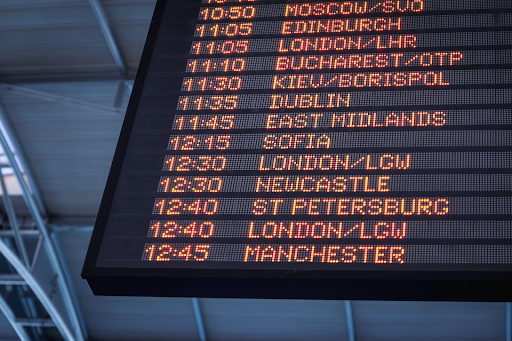

In [20]:
import PIL.Image

img = PIL.Image.open('download.png')
img

In [21]:
import google.generativeai as genai
import typing_extensions as typing

class FlightInfo(typing.TypedDict):
  flight_time: str
  flight_destination: str


model = genai.GenerativeModel('gemini-1.5-flash',
                              # Set the `response_mime_type` to output JSON
                              # Pass the schema object to the `response_schema` field
                              generation_config={"response_mime_type": "application/json",
                                                 "response_schema": list[FlightInfo]})

prompt = "List out the flight times and destinations"

response = model.generate_content([prompt,img])

print(response.text)

[{"flight_destination": "MOSCOW/SUO", "flight_time": "10:50"}, {"flight_destination": "EDINBURGH", "flight_time": "11:05"}, {"flight_destination": "LONDON/LHR", "flight_time": "11:05"}, {"flight_destination": "BUCHAREST/OTP", "flight_time": "11:10"}, {"flight_destination": "KIEV/BORISPOL", "flight_time": "11:30"}, {"flight_destination": "DUBLIN", "flight_time": "11:35"}, {"flight_destination": "EAST MIDLANDS", "flight_time": "11:45"}, {"flight_destination": "SOFIA", "flight_time": "12:15"}, {"flight_destination": "LONDON/LGW", "flight_time": "12:30"}, {"flight_destination": "NEWCASTLE", "flight_time": "12:30"}, {"flight_destination": "ST PETERSBURG", "flight_time": "12:40"}, {"flight_destination": "LONDON/LGW", "flight_time": "12:40"}, {"flight_destination": "MANCHESTER", "flight_time": "12:45"}]


In [22]:
ast.literal_eval(response.text)

[{'flight_destination': 'MOSCOW/SUO', 'flight_time': '10:50'},
 {'flight_destination': 'EDINBURGH', 'flight_time': '11:05'},
 {'flight_destination': 'LONDON/LHR', 'flight_time': '11:05'},
 {'flight_destination': 'BUCHAREST/OTP', 'flight_time': '11:10'},
 {'flight_destination': 'KIEV/BORISPOL', 'flight_time': '11:30'},
 {'flight_destination': 'DUBLIN', 'flight_time': '11:35'},
 {'flight_destination': 'EAST MIDLANDS', 'flight_time': '11:45'},
 {'flight_destination': 'SOFIA', 'flight_time': '12:15'},
 {'flight_destination': 'LONDON/LGW', 'flight_time': '12:30'},
 {'flight_destination': 'NEWCASTLE', 'flight_time': '12:30'},
 {'flight_destination': 'ST PETERSBURG', 'flight_time': '12:40'},
 {'flight_destination': 'LONDON/LGW', 'flight_time': '12:40'},
 {'flight_destination': 'MANCHESTER', 'flight_time': '12:45'}]

In [24]:
import json

class FlightInfo(BaseModel):
    flight_time: str
    flight_destination: str

json_schema = FlightInfo.schema_json(indent=2)
print(json_schema)

model = genai.GenerativeModel(
  "models/gemini-1.5-flash",
  system_instruction=f"""You are a helpful assistant that scans for
  flight times and destinations.
  Using this JSON schema:
    FlightInfo = {json_schema}
  Return a `list[FlightInfo]`

  """,
    generation_config={"response_mime_type": "application/json",
                    #    "response_schema": dict_schema
                       }
)

prompt = "List out the flight times and destinations"

response = model.generate_content([prompt,img])
print(response.text)

{
  "properties": {
    "flight_time": {
      "title": "Flight Time",
      "type": "string"
    },
    "flight_destination": {
      "title": "Flight Destination",
      "type": "string"
    }
  },
  "required": [
    "flight_time",
    "flight_destination"
  ],
  "title": "FlightInfo",
  "type": "object"
}
{"flights": [{"flight_time": "10:50", "flight_destination": "MOSCOW/SUO"}, {"flight_time": "11:05", "flight_destination": "EDINBURGH"}, {"flight_time": "11:05", "flight_destination": "LONDON/LHR"}, {"flight_time": "11:10", "flight_destination": "BUCHAREST/OTP"}, {"flight_time": "11:30", "flight_destination": "KIEV/BORISPOL"}, {"flight_time": "11:35", "flight_destination": "DUBLIN"}, {"flight_time": "11:45", "flight_destination": "EAST MIDLANDS"}, {"flight_time": "12:15", "flight_destination": "SOFIA"}, {"flight_time": "12:30", "flight_destination": "LONDON/LGW"}, {"flight_time": "12:30", "flight_destination": "NEWCASTLE"}, {"flight_time": "12:40", "flight_destination": "ST PETERSB